# 機器學習百日馬拉松 Day6

檢視與處理 Outliers

為何會有 outliers, 常見的 outlier 原因

未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999

可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data-Part01/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data-Part01/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [15]:
app_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [4]:
#先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""

dtype_select = [np.dtype('int64'), np.dtype('float64')]

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
print(len(numeric_columns))
numeric_columns

106


['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [5]:
#再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns:", len(numeric_columns))
numeric_columns

Numbers of remain columns: 73


['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MED

In [6]:
numeric_data = app_train[numeric_columns]
numeric_data

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.000,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,99000.000,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,...,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,-1213.0,...,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,-4597.0,...,0.0,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,365243,-7427.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,135000.000,405000.0,20250.0,405000.0,0.019689,-14469,-2019,-14437.0,...,0.0,2.0,0.0,-1673.0,NaN,NaN,NaN,NaN,NaN,NaN


Columns name: SK_ID_CURR


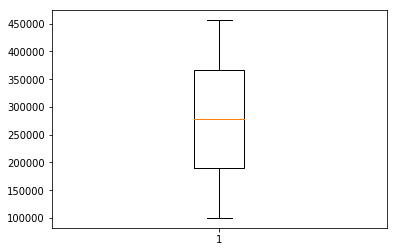

Columns name: CNT_CHILDREN


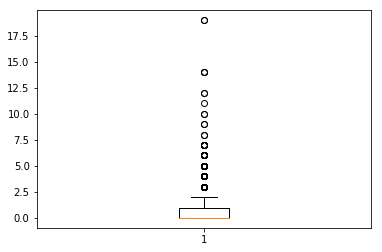

Columns name: AMT_INCOME_TOTAL


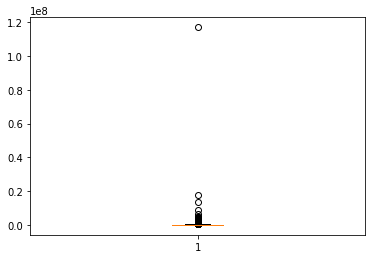

Columns name: AMT_CREDIT


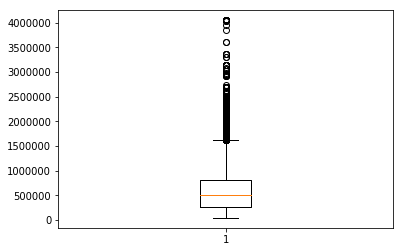

Columns name: AMT_ANNUITY


/Users/eddie/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3821: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/eddie/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Users/eddie/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Users/eddie/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Users/eddie/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


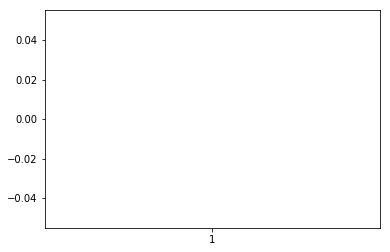

Columns name: AMT_GOODS_PRICE


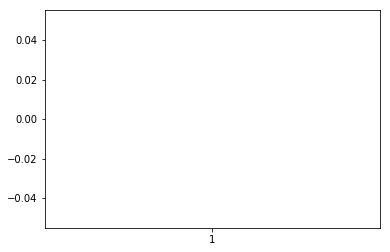

Columns name: REGION_POPULATION_RELATIVE


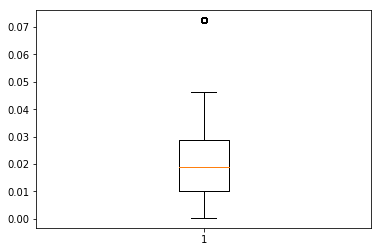

Columns name: DAYS_BIRTH


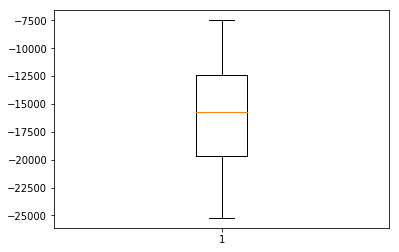

Columns name: DAYS_EMPLOYED


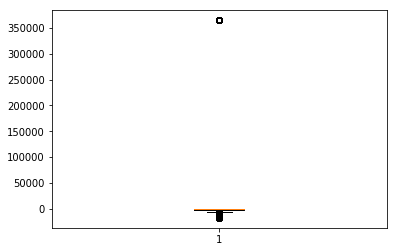

Columns name: DAYS_REGISTRATION


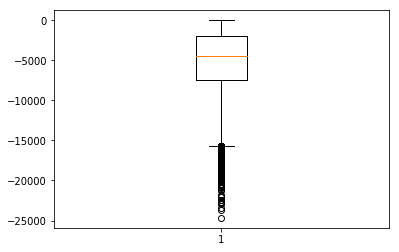

Columns name: DAYS_ID_PUBLISH


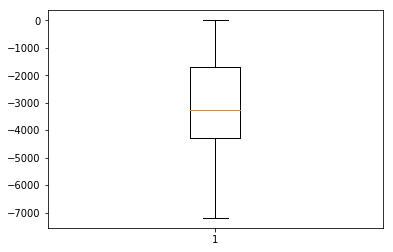

Columns name: OWN_CAR_AGE


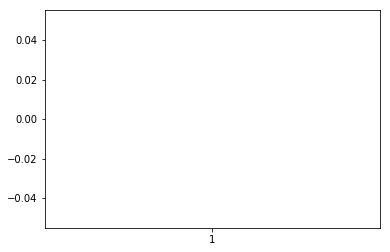

Columns name: CNT_FAM_MEMBERS


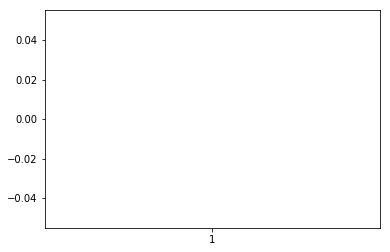

Columns name: REGION_RATING_CLIENT


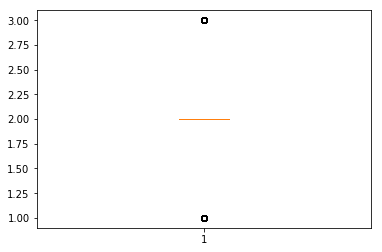

Columns name: REGION_RATING_CLIENT_W_CITY


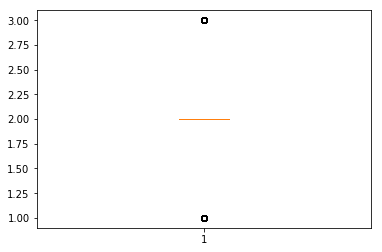

Columns name: HOUR_APPR_PROCESS_START


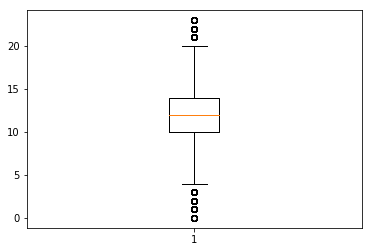

Columns name: EXT_SOURCE_1


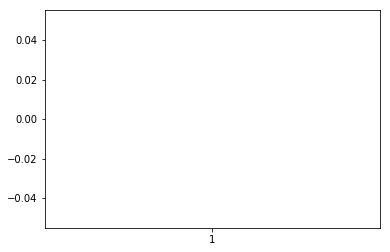

Columns name: EXT_SOURCE_2


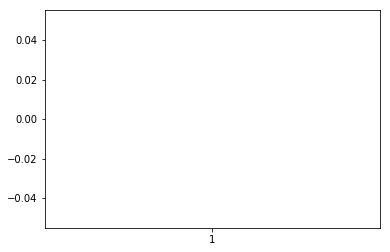

Columns name: EXT_SOURCE_3


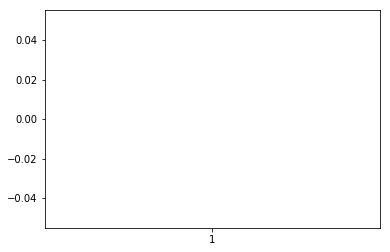

Columns name: APARTMENTS_AVG


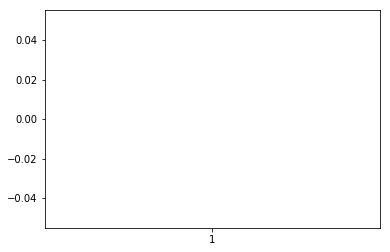

Columns name: BASEMENTAREA_AVG


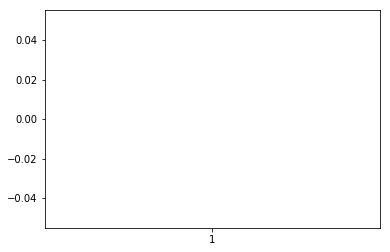

Columns name: YEARS_BEGINEXPLUATATION_AVG


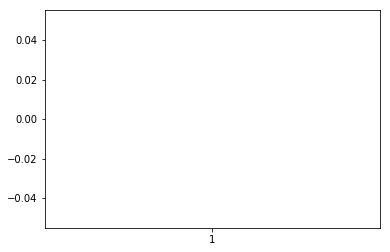

Columns name: YEARS_BUILD_AVG


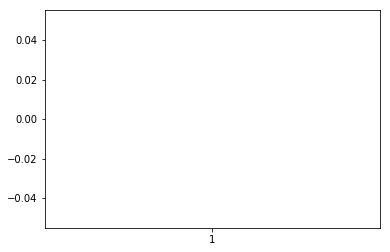

Columns name: COMMONAREA_AVG


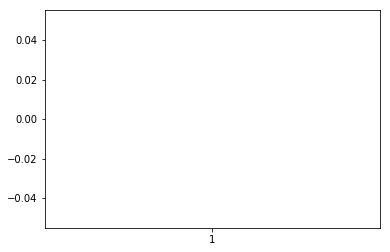

Columns name: ELEVATORS_AVG


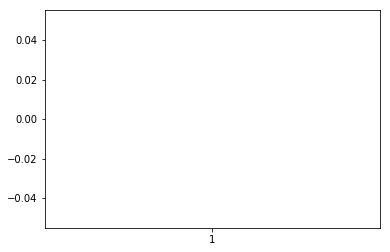

Columns name: ENTRANCES_AVG


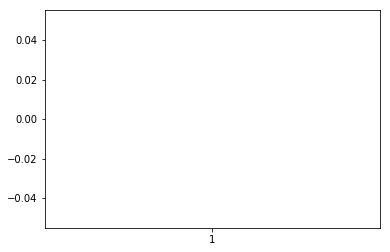

Columns name: FLOORSMAX_AVG


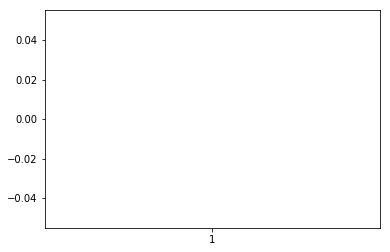

Columns name: FLOORSMIN_AVG


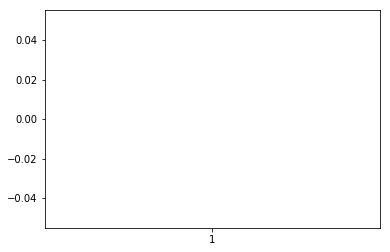

Columns name: LANDAREA_AVG


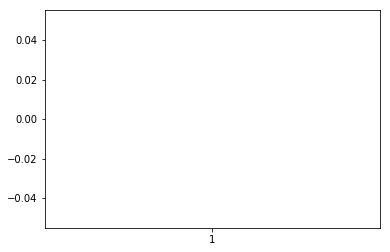

Columns name: LIVINGAPARTMENTS_AVG


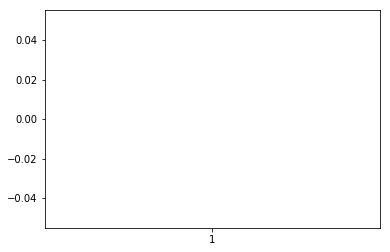

Columns name: LIVINGAREA_AVG


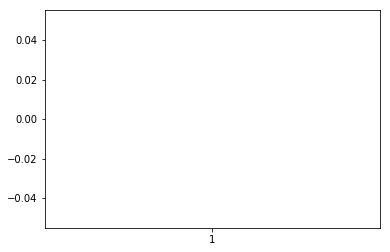

Columns name: NONLIVINGAPARTMENTS_AVG


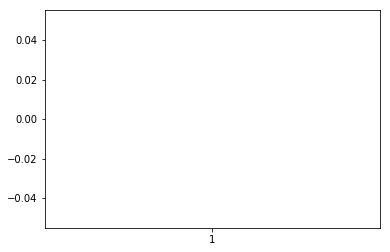

Columns name: NONLIVINGAREA_AVG


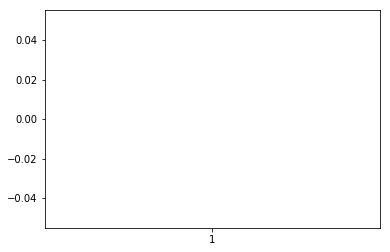

Columns name: APARTMENTS_MODE


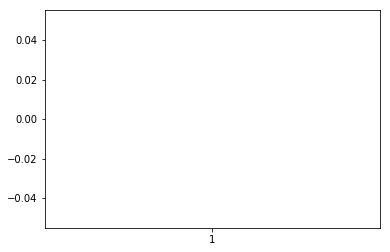

Columns name: BASEMENTAREA_MODE


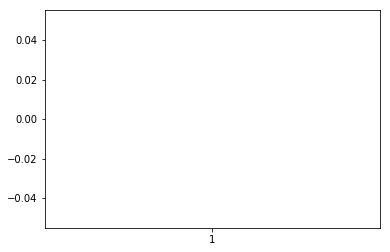

Columns name: YEARS_BEGINEXPLUATATION_MODE


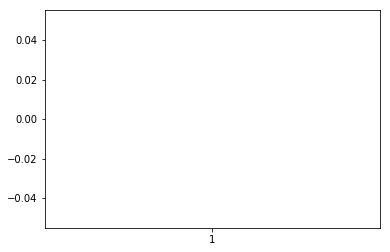

Columns name: YEARS_BUILD_MODE


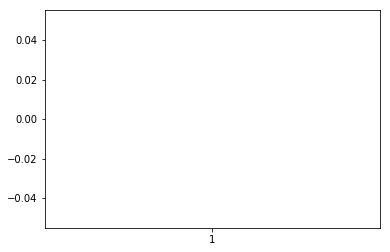

Columns name: COMMONAREA_MODE


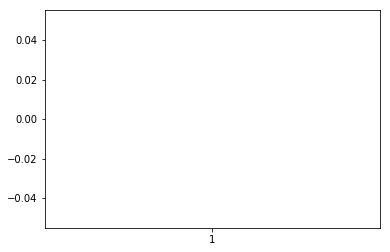

Columns name: ELEVATORS_MODE


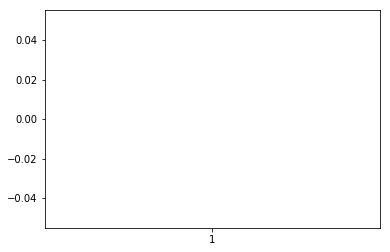

Columns name: ENTRANCES_MODE


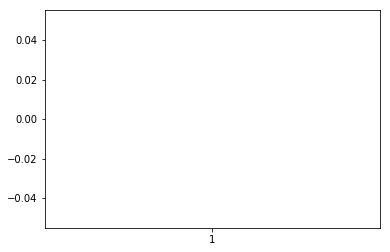

Columns name: FLOORSMAX_MODE


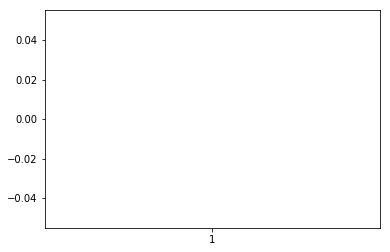

Columns name: FLOORSMIN_MODE


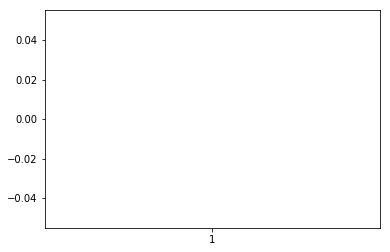

Columns name: LANDAREA_MODE


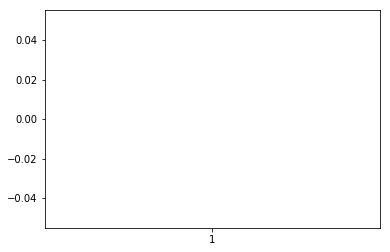

Columns name: LIVINGAPARTMENTS_MODE


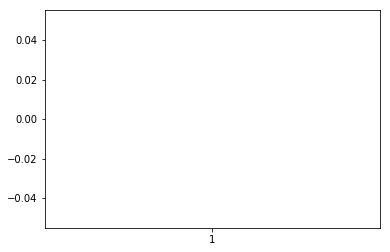

Columns name: LIVINGAREA_MODE


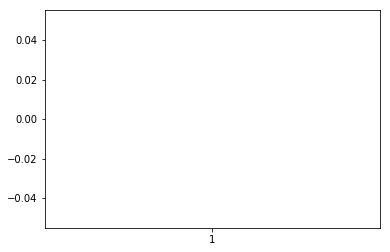

Columns name: NONLIVINGAPARTMENTS_MODE


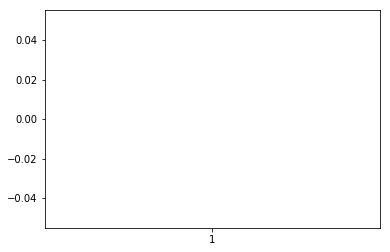

Columns name: NONLIVINGAREA_MODE


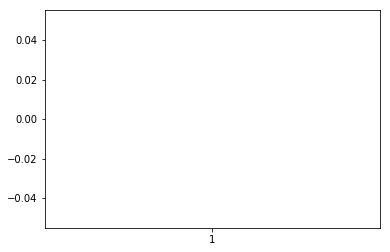

Columns name: APARTMENTS_MEDI


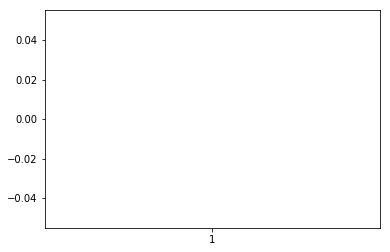

Columns name: BASEMENTAREA_MEDI


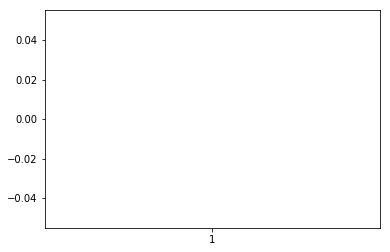

Columns name: YEARS_BEGINEXPLUATATION_MEDI


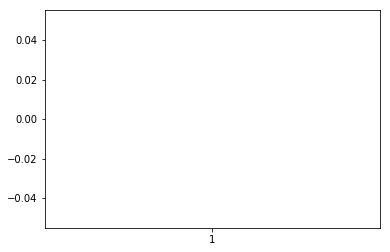

Columns name: YEARS_BUILD_MEDI


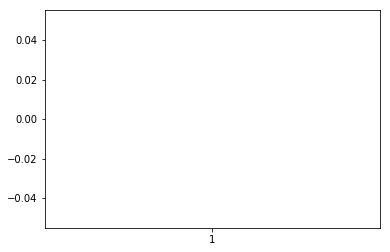

Columns name: COMMONAREA_MEDI


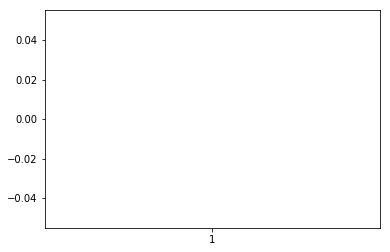

Columns name: ELEVATORS_MEDI


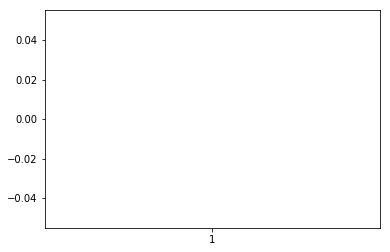

Columns name: ENTRANCES_MEDI


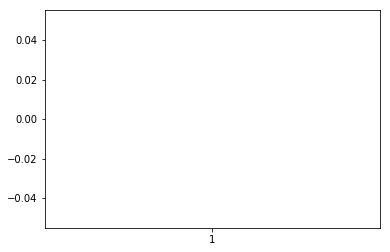

Columns name: FLOORSMAX_MEDI


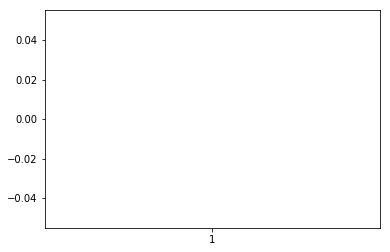

Columns name: FLOORSMIN_MEDI


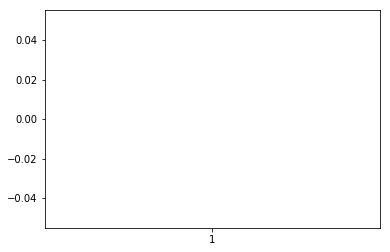

Columns name: LANDAREA_MEDI


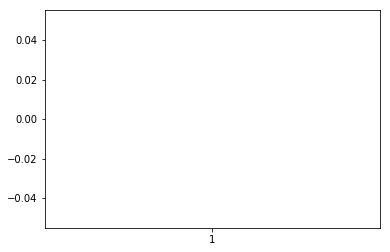

Columns name: LIVINGAPARTMENTS_MEDI


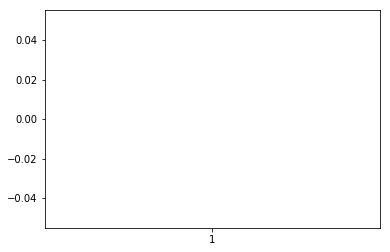

Columns name: LIVINGAREA_MEDI


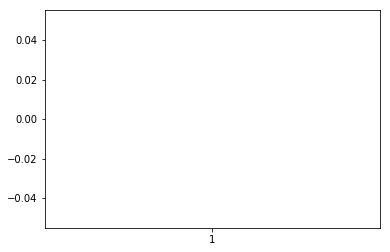

Columns name: NONLIVINGAPARTMENTS_MEDI


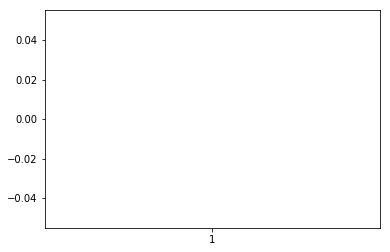

Columns name: NONLIVINGAREA_MEDI


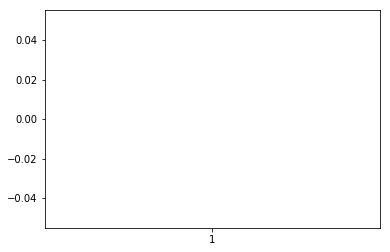

Columns name: TOTALAREA_MODE


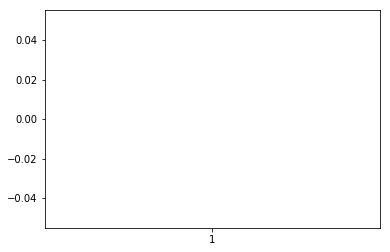

Columns name: OBS_30_CNT_SOCIAL_CIRCLE


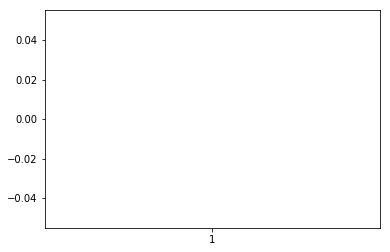

Columns name: DEF_30_CNT_SOCIAL_CIRCLE


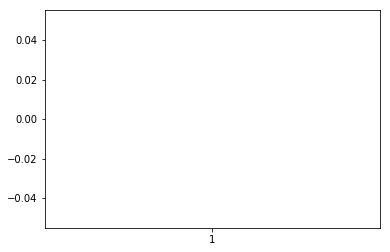

Columns name: OBS_60_CNT_SOCIAL_CIRCLE


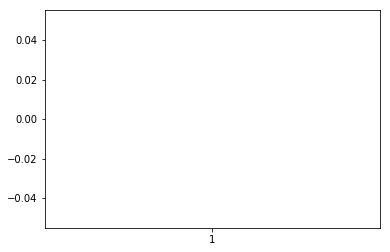

Columns name: DEF_60_CNT_SOCIAL_CIRCLE


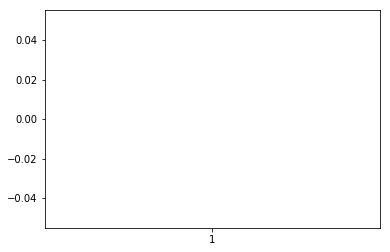

Columns name: DAYS_LAST_PHONE_CHANGE


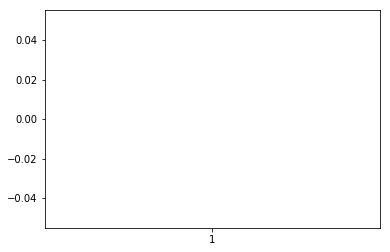

Columns name: AMT_REQ_CREDIT_BUREAU_HOUR


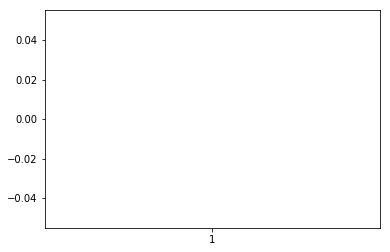

Columns name: AMT_REQ_CREDIT_BUREAU_DAY


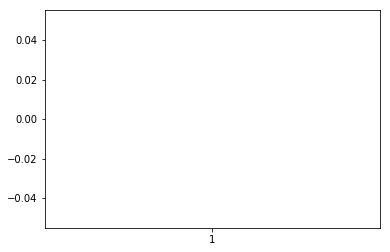

Columns name: AMT_REQ_CREDIT_BUREAU_WEEK


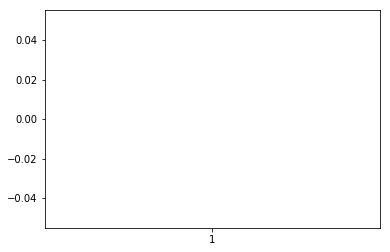

Columns name: AMT_REQ_CREDIT_BUREAU_MON


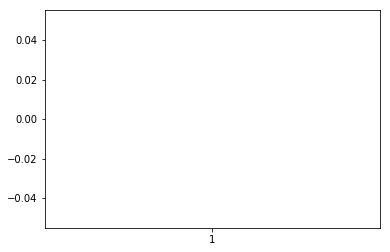

Columns name: AMT_REQ_CREDIT_BUREAU_QRT


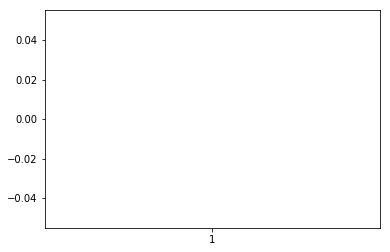

Columns name: AMT_REQ_CREDIT_BUREAU_YEAR


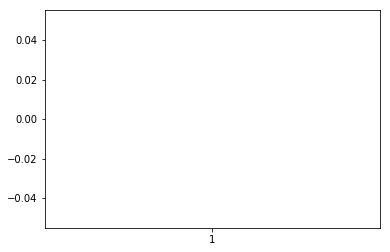

In [7]:
# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    print('Columns name:', col)
    plt.boxplot(numeric_data[col])
    plt.show()

In [8]:
#發現有許多圖是空白的，觀察後發現應該是因為有空值造成的，試試移除有空值的欄位，避免影響做圖
drop_value = numeric_data.dropna()

Columns name: SK_ID_CURR


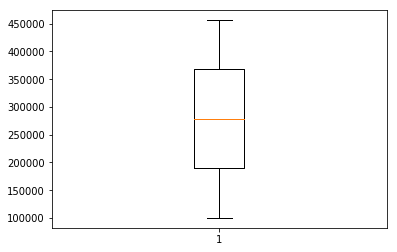

Columns name: CNT_CHILDREN


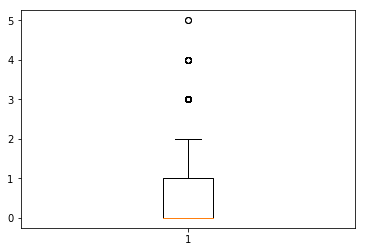

Columns name: AMT_INCOME_TOTAL


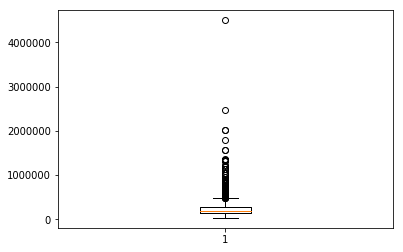

Columns name: AMT_CREDIT


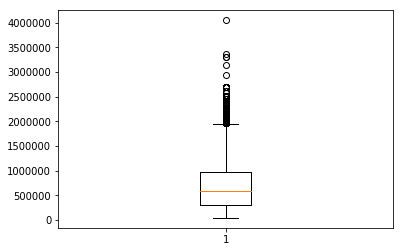

Columns name: AMT_ANNUITY


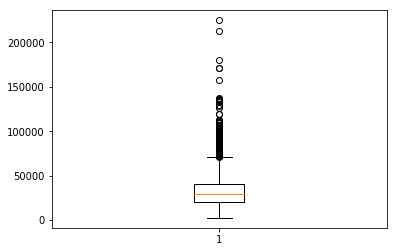

Columns name: AMT_GOODS_PRICE


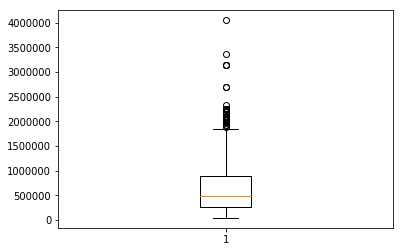

Columns name: REGION_POPULATION_RELATIVE


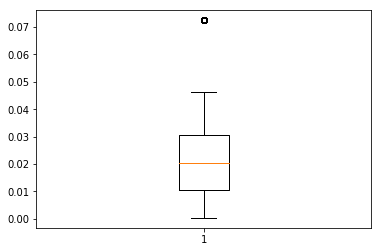

Columns name: DAYS_BIRTH


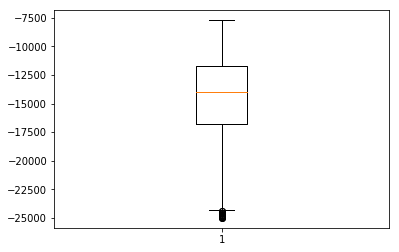

Columns name: DAYS_EMPLOYED


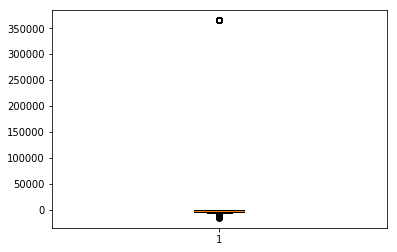

Columns name: DAYS_REGISTRATION


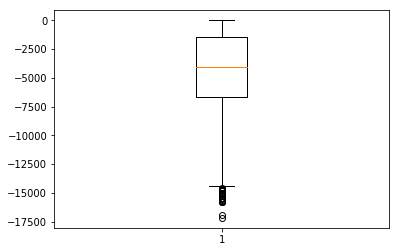

Columns name: DAYS_ID_PUBLISH


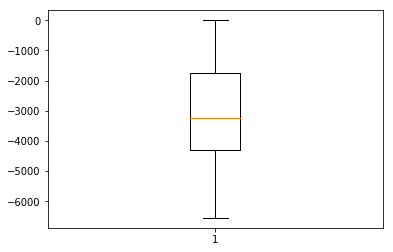

Columns name: OWN_CAR_AGE


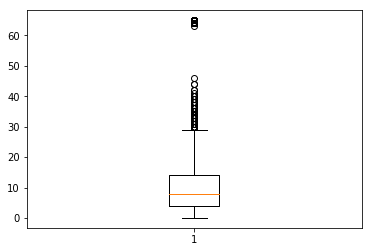

Columns name: CNT_FAM_MEMBERS


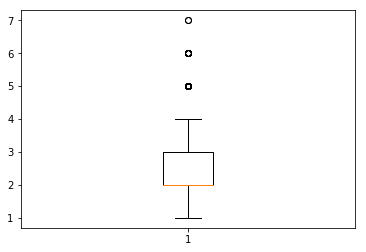

Columns name: REGION_RATING_CLIENT


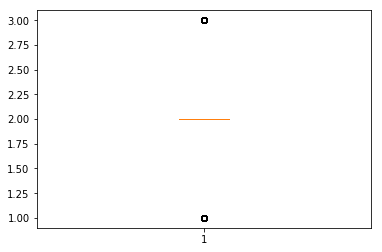

Columns name: REGION_RATING_CLIENT_W_CITY


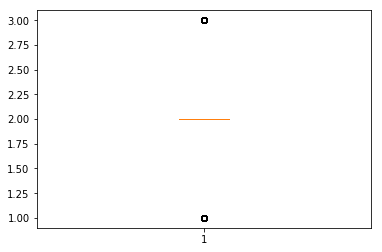

Columns name: HOUR_APPR_PROCESS_START


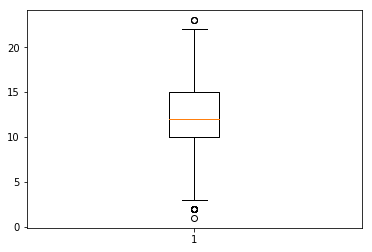

Columns name: EXT_SOURCE_1


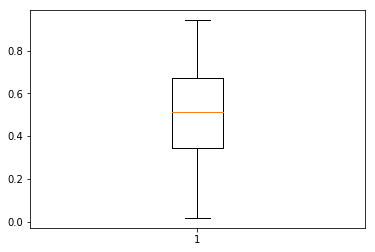

Columns name: EXT_SOURCE_2


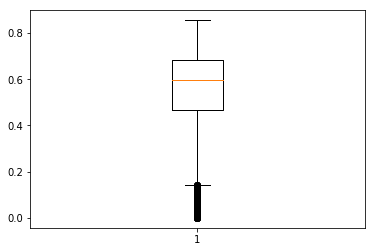

Columns name: EXT_SOURCE_3


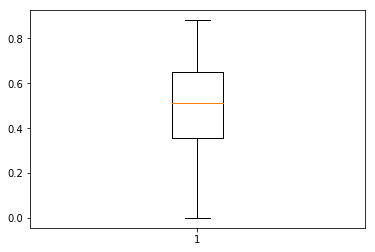

Columns name: APARTMENTS_AVG


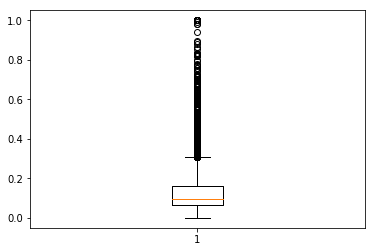

Columns name: BASEMENTAREA_AVG


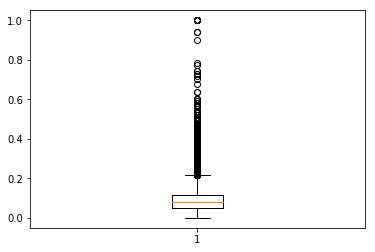

Columns name: YEARS_BEGINEXPLUATATION_AVG


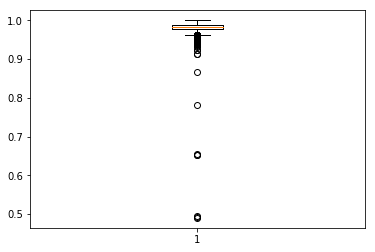

Columns name: YEARS_BUILD_AVG


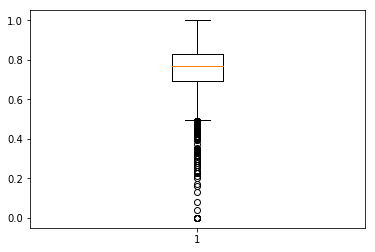

Columns name: COMMONAREA_AVG


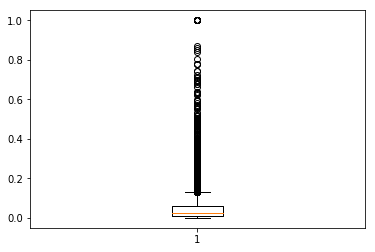

Columns name: ELEVATORS_AVG


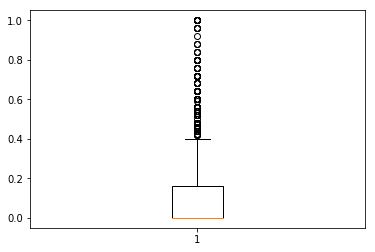

Columns name: ENTRANCES_AVG


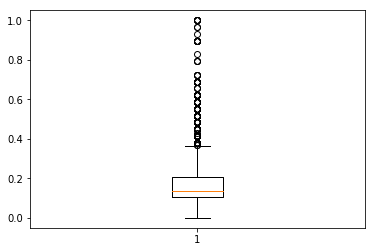

Columns name: FLOORSMAX_AVG


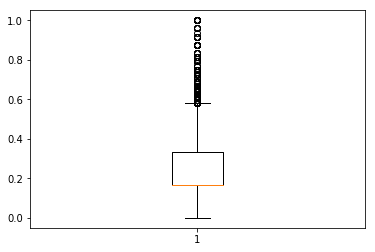

Columns name: FLOORSMIN_AVG


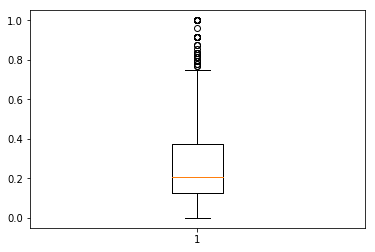

Columns name: LANDAREA_AVG


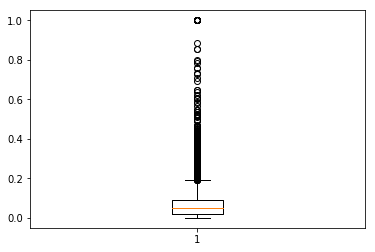

Columns name: LIVINGAPARTMENTS_AVG


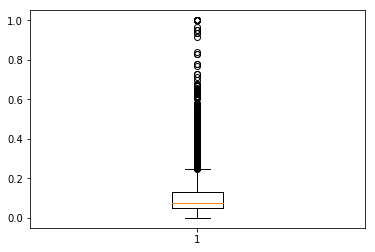

Columns name: LIVINGAREA_AVG


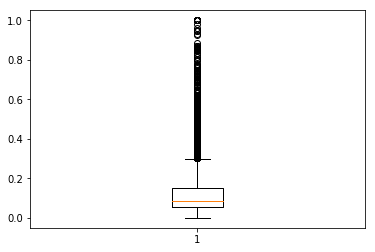

Columns name: NONLIVINGAPARTMENTS_AVG


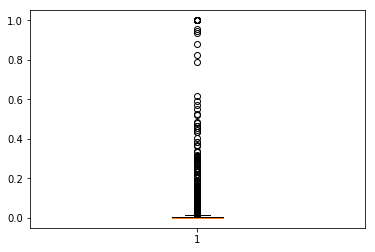

Columns name: NONLIVINGAREA_AVG


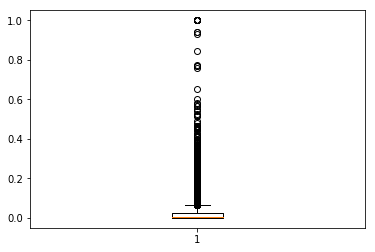

Columns name: APARTMENTS_MODE


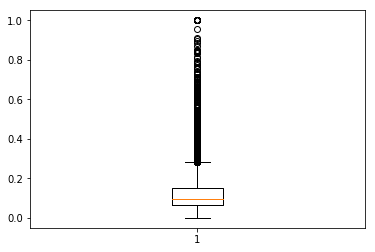

Columns name: BASEMENTAREA_MODE


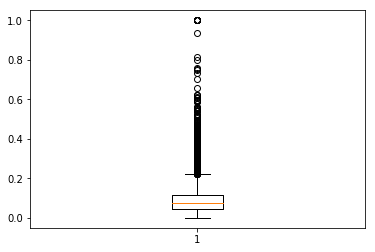

Columns name: YEARS_BEGINEXPLUATATION_MODE


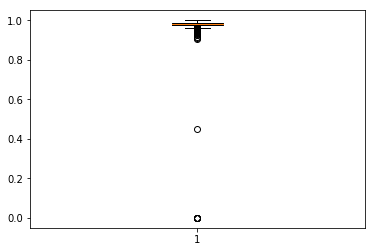

Columns name: YEARS_BUILD_MODE


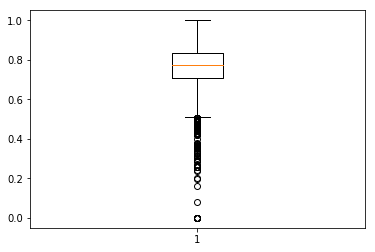

Columns name: COMMONAREA_MODE


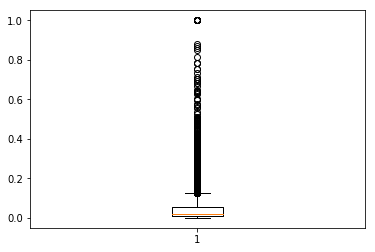

Columns name: ELEVATORS_MODE


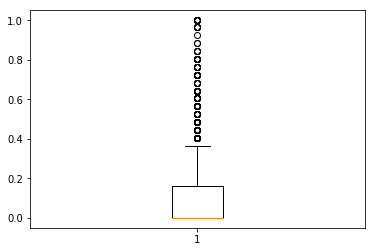

Columns name: ENTRANCES_MODE


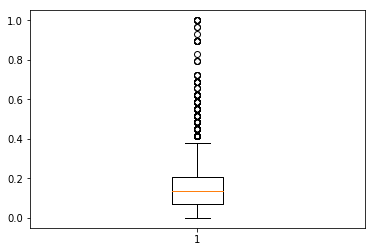

Columns name: FLOORSMAX_MODE


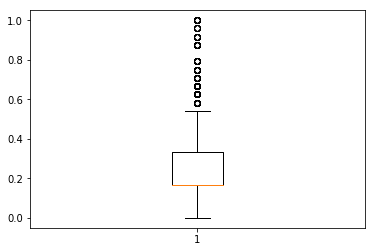

Columns name: FLOORSMIN_MODE


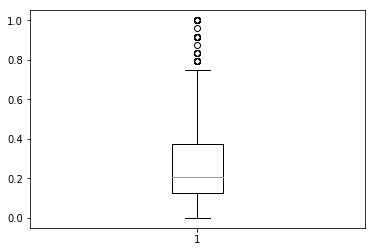

Columns name: LANDAREA_MODE


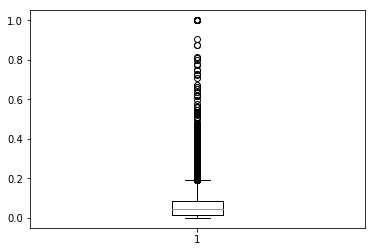

Columns name: LIVINGAPARTMENTS_MODE


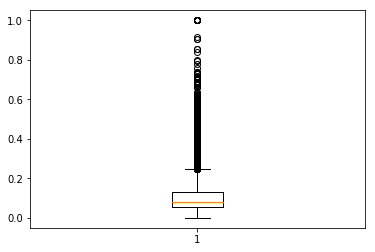

Columns name: LIVINGAREA_MODE


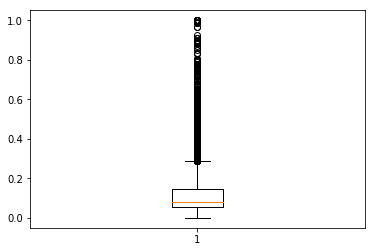

Columns name: NONLIVINGAPARTMENTS_MODE


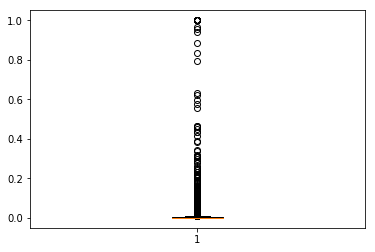

Columns name: NONLIVINGAREA_MODE


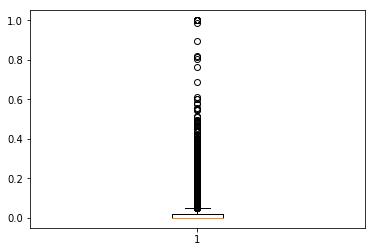

Columns name: APARTMENTS_MEDI


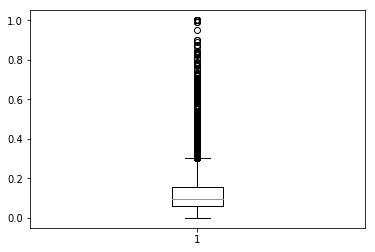

Columns name: BASEMENTAREA_MEDI


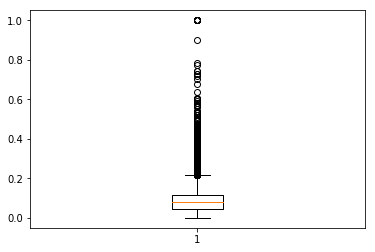

Columns name: YEARS_BEGINEXPLUATATION_MEDI


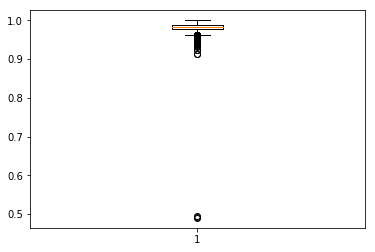

Columns name: YEARS_BUILD_MEDI


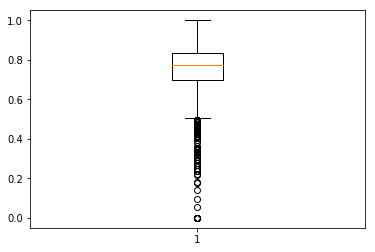

Columns name: COMMONAREA_MEDI


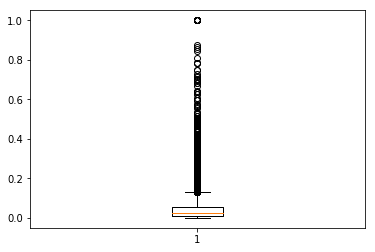

Columns name: ELEVATORS_MEDI


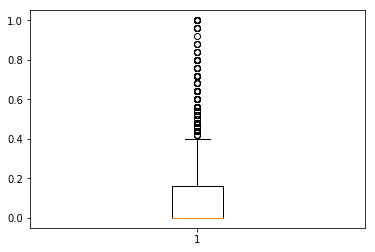

Columns name: ENTRANCES_MEDI


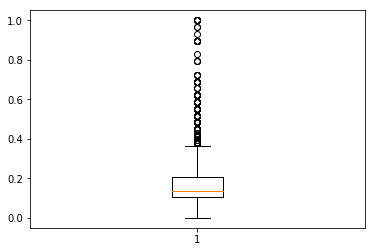

Columns name: FLOORSMAX_MEDI


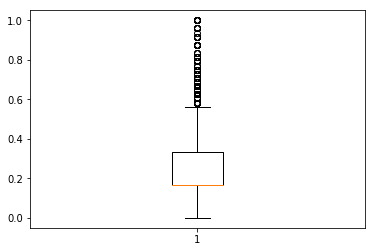

Columns name: FLOORSMIN_MEDI


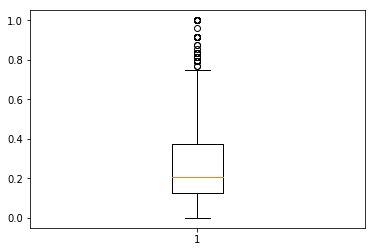

Columns name: LANDAREA_MEDI


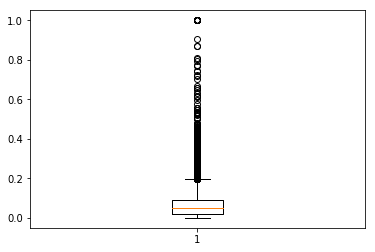

Columns name: LIVINGAPARTMENTS_MEDI


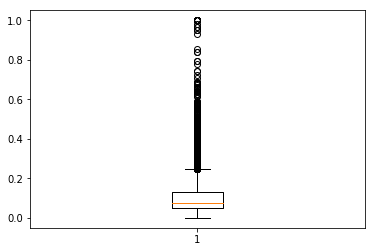

Columns name: LIVINGAREA_MEDI


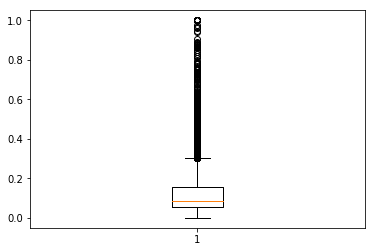

Columns name: NONLIVINGAPARTMENTS_MEDI


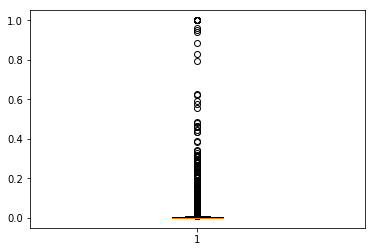

Columns name: NONLIVINGAREA_MEDI


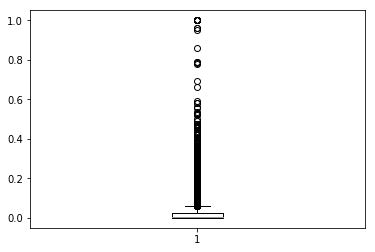

Columns name: TOTALAREA_MODE


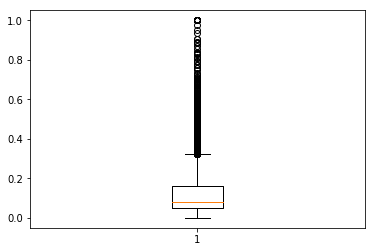

Columns name: OBS_30_CNT_SOCIAL_CIRCLE


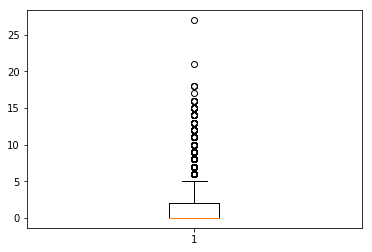

Columns name: DEF_30_CNT_SOCIAL_CIRCLE


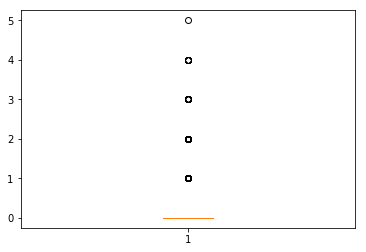

Columns name: OBS_60_CNT_SOCIAL_CIRCLE


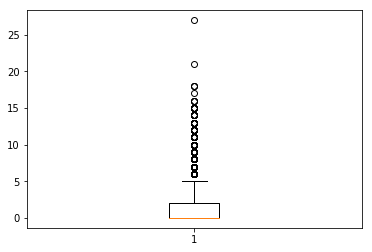

Columns name: DEF_60_CNT_SOCIAL_CIRCLE


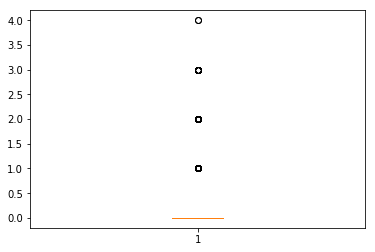

Columns name: DAYS_LAST_PHONE_CHANGE


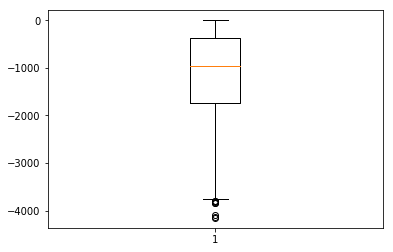

Columns name: AMT_REQ_CREDIT_BUREAU_HOUR


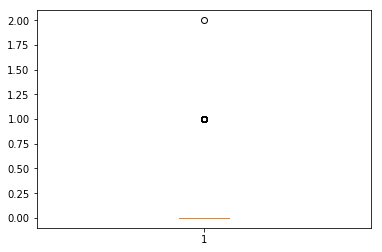

Columns name: AMT_REQ_CREDIT_BUREAU_DAY


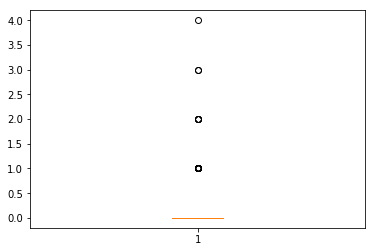

Columns name: AMT_REQ_CREDIT_BUREAU_WEEK


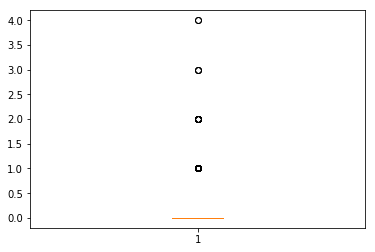

Columns name: AMT_REQ_CREDIT_BUREAU_MON


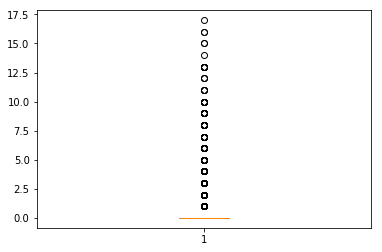

Columns name: AMT_REQ_CREDIT_BUREAU_QRT


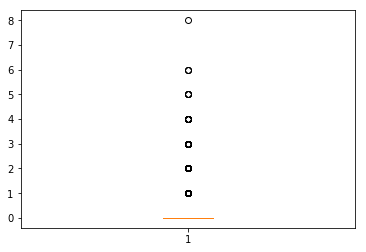

Columns name: AMT_REQ_CREDIT_BUREAU_YEAR


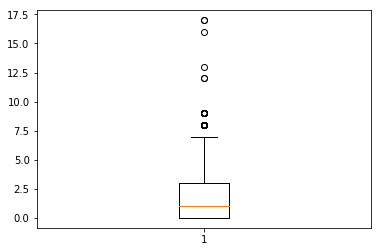

In [9]:
# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    print('Columns name:', col)
    plt.boxplot(drop_value[col])
    plt.show()

In [10]:
# 刪除空值後盒型圖都可以正常顯示，確實是因為有空值的影響
# 再從上面的圖檢查的結果，蠻多欄位都有outliers，挑出這三個欄位觀察

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

In [11]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


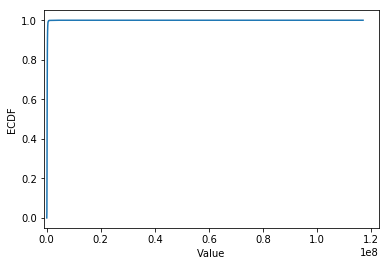

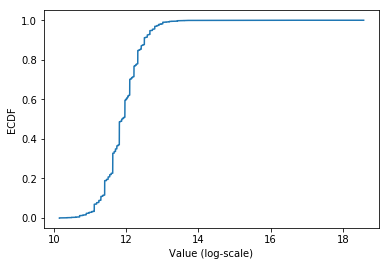

In [66]:
# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
cdf = np.sort(app_train['AMT_INCOME_TOTAL'])

plt.plot(cdf, np.arange(1, len(cdf)+1) / len(cdf))
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.min()-1000000, cdf.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(cdf), np.arange(1, len(cdf)+1) / len(cdf))
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

In [58]:
# 看以上的圖發現最大值離平均數很遠

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


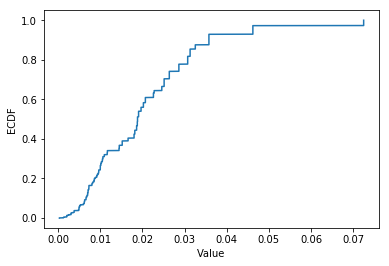

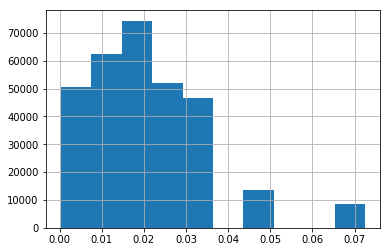

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [67]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = np.sort(app_train['REGION_POPULATION_RELATIVE'])


plt.plot(cdf, np.arange(1, len(cdf) + 1) / len(cdf))
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    11351.000000
mean         1.326932
std          2.193618
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         27.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


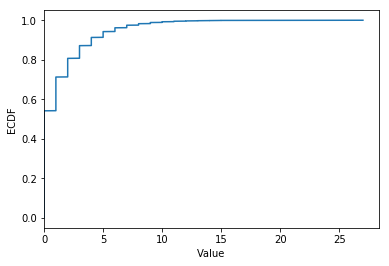

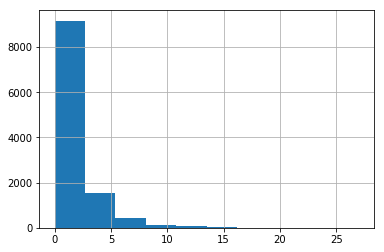

27.0       1
21.0       1
18.0       3
17.0       1
16.0       4
15.0       9
14.0       8
13.0      12
12.0      18
11.0      30
10.0      44
9.0       67
8.0       88
7.0      148
6.0      219
5.0      335
4.0      471
3.0      730
2.0     1072
1.0     1940
0.0     6150
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [69]:
# 最大值落在分布之外 ，這邊使用去除遺失值得欄位處理
print(drop_value['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = np.sort(drop_value['OBS_60_CNT_SOCIAL_CIRCLE'])


plt.plot(cdf, np.arange(1, len(cdf) +1 ) / len(cdf))
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.min() * 0.95, cdf.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
drop_value['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(drop_value['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

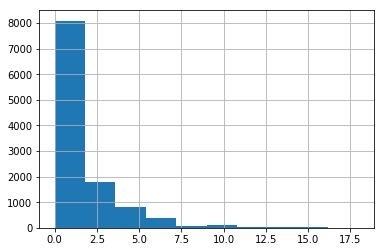

In [70]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
mask = drop_value['OBS_60_CNT_SOCIAL_CIRCLE'] < 20
drop_value['OBS_60_CNT_SOCIAL_CIRCLE'][mask].hist()
plt.show()